## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

# Visualization
import matplotlib.pyplot as plt


# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

In [19]:
## READING MICE DATA
mice = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/Ex 01 - 05_06_19 - Edited.xlsx')
#mice.head()

In [8]:
## Selecting columns and the first 5000 rows then plotting 
x = mice["Minutes"]
y = mice.iloc[:,9] #selecting CC002-558 Exp. 1 MRSA Deg. C Data

#plt.plot(x[:5000],y[:5000])
#plt.xlabel("Minutes") #x label
#plt.ylabel("Temperature (°C)") #y label

# Filling in missing values using forward fill
y1_fw = y.fillna(method='ffill')
y1_bw = y1_fw.fillna(method='bfill') #backward fill

## Time Delay Embedding

In [9]:
#TDE on original data
Z = tde.tde(y1_bw)
Z = Z.T
#Z

#TDE on the data that had values excluded
#X = tde.tde(y1)
#X=X.T #transporting the data


## Train Test Split


In [48]:
# ORIGINAL DATA
#importing the model
model = svm.OneClassSVM()

#fit the data
model.fit(Z[:5041,:]) #5001

#predict the data
predict_1 = model.predict(Z[720:5041,:]) #5001
predict_2 = model.predict(Z[5041:,:])


array([-1, -1, -1, ..., -1, -1, -1])

## Applying SVM

#### Training Data

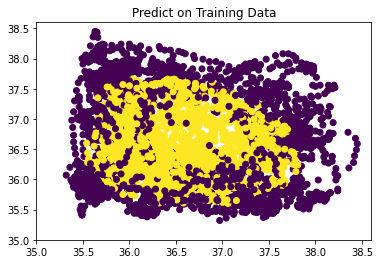

In [88]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[720:5041,0],Z[720:5041,1], c = predict_1)
plt.xlim(35, 38.6) 
plt.ylim(35, 38.6)
plt.title("Predict on Training Data")

# Saving the Image
Predict_train = "Predict_train.png"   # saving the file as the name of the mouse
plt.savefig(Predict_train, facecolor='white')

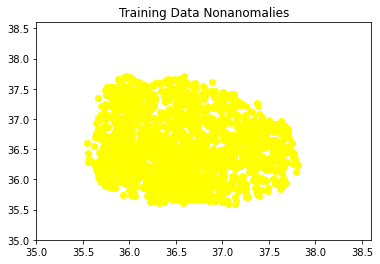

In [79]:
# Plotting the scatterplot (predicting on train data) 
# NONANOMALY
nonanomaly_1 = predict_1 == 1
z_nonanomaly_1 = Z[720:5041,:][nonanomaly_1]
plot_nonanomaly_1= plt.scatter(z_nonanomaly_1[:, 0], z_nonanomaly_1[:, 1], c= "yellow")
plt.xlim(35, 38.6)  
plt.ylim(35, 38.6)
plt.title("Training Data Nonanomalies")

# Saving the Image
Nonanomaly_1 = "Nonanomaly_1.png"   # saving the file as the name of the mouse
plt.savefig(Nonanomaly_1, facecolor='white')

In [111]:
sum(nonanomaly_1)

2074

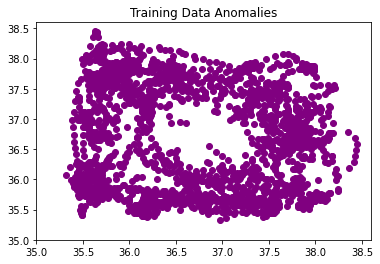

In [81]:
# Plotting the scatterplot (predicting on train data) 
# ANOMALY
anomaly_1 = predict_1 == -1
z_anomaly_1 = Z[720:5041,:][anomaly_1]
plot_anomaly_1= plt.scatter(z_anomaly_1[:, 0], z_anomaly_1[:, 1], c= "purple")
plt.xlim(35, 38.6)  
plt.ylim(35, 38.6)
plt.title("Training Data Anomalies")

# Saving the Image
Anomaly_1 = "Anomaly_1.png"   # saving the file as the name of the mouse
plt.savefig(Anomaly_1, facecolor='white')

In [115]:
sum(anomaly_1)
(sum(anomaly_1)/sum(nonanomaly_1+anomaly_1))*100

52.00185142328165

#### Testing Data

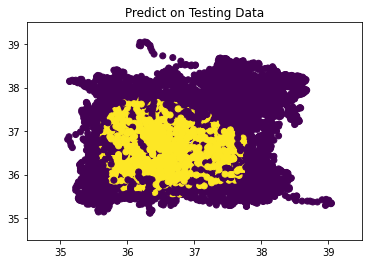

In [83]:
# Plotting the scatterplot (predicting on train data)
plt.scatter(Z[5041:,0],Z[5041:,1], c = predict_2)
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Predict on Testing Data")

# Saving the Image
Predict_test = "Predict_test.png"   # saving the file as the name of the mouse
plt.savefig(Predict_test, facecolor='white')

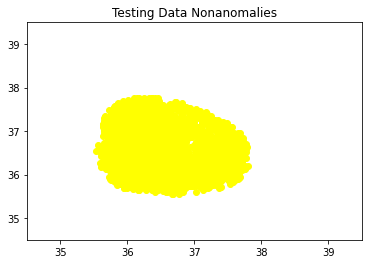

In [80]:
# Plotting the scatterplot (predicting on test data) 
# NONANOMALY
nonanomaly_2 = predict_2 == 1
z_nonanomaly_2 = Z[5041:,:][nonanomaly_2]
plot_nonanomaly_2= plt.scatter(z_nonanomaly_2[:, 0], z_nonanomaly_2[:, 1], c= "yellow")
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Testing Data Nonanomalies")

# Saving the Image
Nonanomaly_2 = "Nonanomaly_2.png"   # saving the file as the name of the mouse
plt.savefig(Nonanomaly_2, facecolor='white')

In [114]:
sum(nonanomaly_2)
(sum(nonanomaly_2)/sum(nonanomaly_2+anomaly_2))*100

17.795427712783084

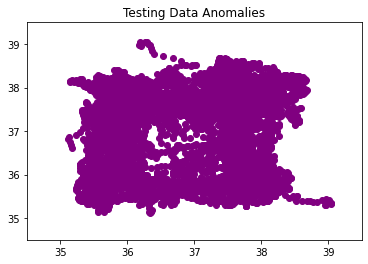

In [82]:
# Plotting the scatterplot (predicting on test data) 
# ANOMALY
anomaly_2 = predict_2 == -1
z_anomaly_2 = Z[5041:,:][anomaly_2]
plot_anomaly_2= plt.scatter(z_anomaly_2[:, 0], z_anomaly_2[:, 1], c= "purple")
plt.xlim(34.5, 39.5)  
plt.ylim(34.5, 39.5)
plt.title("Testing Data Anomalies")

# Saving the Image
Anomaly_2 = "Anomaly_2.png"   # saving the file as the name of the mouse
plt.savefig(Anomaly_2, facecolor='white')

In [113]:
sum(anomaly_2)
(sum(anomaly_2)/sum(nonanomaly_2+anomaly_2))*100

82.20457228721692

## Scoring 

In [90]:
scores_1 = model.score_samples(Z[720:5041,:])
scores_2 = model.score_samples(Z[5041:,:])

(-1.2, 1.2)

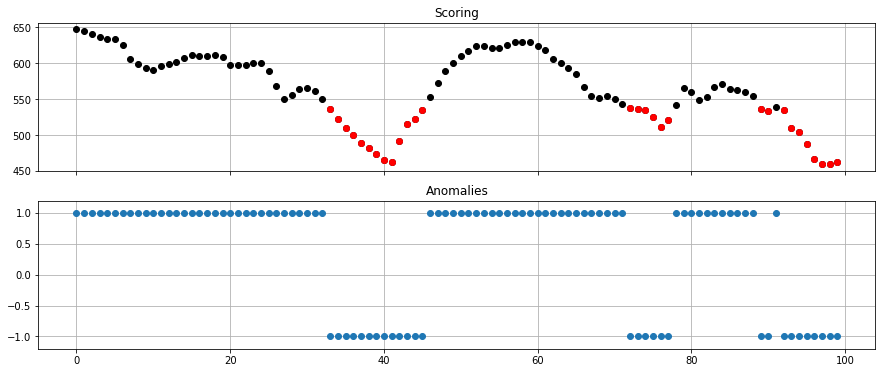

In [107]:
fig,ax = plt.subplots(2, 1, figsize=(15,6), sharex = True)

#plt.plot(scores,'o')
ax[0].plot(scores_1[:100], 'o', color='black')  # Plot the scores with blue color
ax[0].grid()
ax[0].set_title("Scoring")

# Find the indices of the anomalies
anomaly_indices = [index for index, value in enumerate(predict_1[:100]) if value == -1]

# Plot the anomalies with red color
ax[0].plot(anomaly_indices, scores_1[:100][anomaly_indices], 'o', color='red')

ax[1].plot(predict_1[:100], 'o')
ax[1].grid()
ax[1].set_title("Anomalies")
ax[1].set_ylim(-1.2, 1.2)


## The x axis starts at 0-200, how do I fix?

## Ignore

In [ ]:
# WITH EXCLUDED VALUES ( Cannot be applied since it needs values)
#importing the model
model_2 = svm.OneClassSVM()

#fit the data
model_2.fit(X[:5000,:])

#predict the data
predict_2 = model_2.predict(X[5001:,:])

#creating a second mask in which outliers = -1
#mask1 = outliers == -1
#Xmask = X[5001:][mask1]

In [ ]:
mask = y.notna() # will keep the true values
x1 = x[mask]
y1 = y[mask]
plt.plot(x1[:5000],y1[:5000])
plt.xlabel("Minutes") #x label
plt.ylabel("Temperature (Celsius)") #y label

In [ ]:
# Want to measure how many values were removed
len(y)-len(y1) #we got rid of 5842 data points

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(15,6), sharex = True)
fig.set_facecolor("white") # Changing the border to white

ax[0].plot(x[10000:13550],y[10000:13550])
ax[0].set_ylabel("Temperature (°C)")
ax[0].set_title("Original Time Series")
ax[0].grid()
ax[1].plot(x1[10000:13550],y1[10000:13550])
ax[1].set_xlabel("Minutes")
ax[1].set_ylabel("Temperature (°C)")
ax[1].set_title("Time series with excluded values")
ax[1].grid()

## Ignore

In [ ]:
xtime=x1[5001:]

In [ ]:
plt.subplot(2, 1, 1)
#plt.plot(predict,'o')
plt.scatter(x1[0:16000],y1[0:16000],c=predict[0:16000])
plt.grid()
plt.title("Anomolies")

plt.subplot(2, 1, 2)
#plt.plot(scores,'o')
plt.plot(x1[0:16000],scores[0:16000])
plt.grid()
plt.title("Scoring")



In [ ]:
plt.plot(xtime,predict)

In [ ]:
(len(X)-5000)/len(X) #This is only showing 78.7% of the data for one mice 

In [ ]:
#plt.scatter(X[5001:,1],X[5001:,2], c = outliers)

In [ ]:
#nonanomaly = outliers ==1
nonanomoly = predict == 1
x_nonanomoly = X[5001:,:][nonanomoly]
plot_nonanom= plt.scatter(x_nonanomoly[:, 0], x_nonanomoly[:, 1], c=predict[nonanomoly])

In [ ]:
#anomaly = outliers ==-1
anomoly = outliers == -1
x_anomoly = X[5001:,][anomoly]
plot_anom= plt.scatter(x_anomoly[:, 0], x_anomoly[:, 1], c="red")

In [ ]:
#plt.plot(x1[5001:], X[5001:])
len(x1)

In [ ]:
len()

In [ ]:
plt.plot(x1[:5000],y1[:5000])

In [ ]:
plt.plot(x1[5001:],y1[5001:], c=outliers[x_anomoly])

In [ ]:
plt.plot(x1[:],y1[:])